In [607]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
def f(x) -> float:
    return x**2 + math.cos(2*x) + 2*math.log(x)

In [608]:
def df(x) -> float:
    return 2*(x + (1/x) - math.sin(2*x))

In [609]:
x = [i for i in range (1, 21, 1)]
print(x)
y = [f(i) for i in x]
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.5838531634528576, 4.732650740256279, 12.157394863986585, 18.62708868843117, 27.379804295791747, 40.427372897188604, 53.02855751631846, 67.20122360303628, 86.05476586291653, 105.01325224780147, 124.7958297192021, 149.393992306913, 174.77681803725173, 200.31550879291694, 230.57035185209202, 262.37940080498606, 293.81785641332783, 329.65277982616493, 367.8439516023802, 405.3245264854557]


## Numerical differentiation
### First derivative:
left O(h):
$$ f'(x_i) \simeq \frac {f(x_i) - f(x_{i-1})}{h}$$

right O(h):
$$ f'(x_i) \simeq \frac {f(x_{i+1}) - f(x_i)}{h}$$

central O(h^2):
$$ f'(x_i) \simeq \frac {f(x_{i+1}) - f(x_{i-1})}{2h}$$

### Second derivative:
central O(h^2):
$$ f''(x_i) \simeq \frac {f(x_{i-1}) - 2f(x_i) + f(x_{i-1})}{h^2}$$



In [610]:
def leftdf(f, x_cur, x_prev, h) -> float:
    return (f(x_cur)-f(x_prev))/h

def rightdf(f, x_next, x_cur, h) -> float:
    return (f(x_next)-f(x_cur))/h

def centraldf(f, x_next, x_prev, h) -> float:
    return (f(x_next)-f(x_prev))/2*h

def central2df(f, x_cur, x_prev, h) -> float:
    return (f(x_prev)-2*f(x_cur)+f(x_prev))/h**2

Text(0.5, 1.0, 'f(x) = x**2 + math.cos(2*x) + 2*math.log(x)')

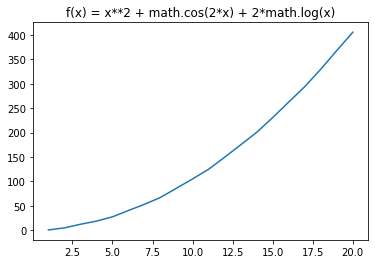

In [611]:
sns.lineplot(x=x,y=y).set_title('f(x) = x**2 + math.cos(2*x) + 2*math.log(x)')

In [612]:
derivative = [df(i) for i in x]
print(derivative)
print('len =', len(derivative))

[2.1814051463486366, 6.513604990615857, 7.225497663064519, 6.521283506753236, 11.48804222177874, 13.406479169334204, 12.304499574324545, 16.82580663333013, 19.724196715765572, 18.374109498544744, 22.19952080039899, 25.977823390679916, 24.62872925288695, 27.601045566241403, 32.10939658151906, 31.02214663751662, 33.05948168658348, 38.094668817997345, 37.51252600047597, 38.609773679041304]
len = 20


Text(0.5, 1.0, 'df/dx = 2*(x + (1/x) - math.sin(2*x))')

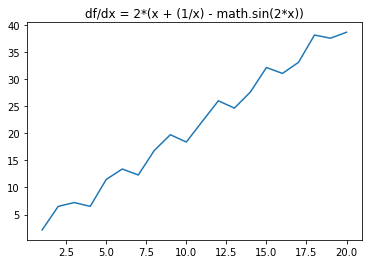

In [613]:
sns.lineplot(x=x,y=derivative).set_title('df/dx = 2*(x + (1/x) - math.sin(2*x))')

$$ f(x_k) = \frac{f(x_k+h) - f(x_k)}{h} $$

### optimal h
$$ h = 2*\sqrt{\varepsilon{ {\frac{|f(x)|}{|f''(x)|}}}} $$

In [615]:
def secder(x):
    return -2/x**2 - 4*math.cos(2*x) + 2

def optimal_h(f, x) -> float:
    eps = 2.2*10**-16
    opt_h = 2*math.sqrt((eps*abs(f(x)))/abs(secder(x)))
    return opt_h

def numdf(f, x, h):
    return (f(x+h) - f(x)) / h

numder = []
for i in range (0, len(x)):
    numder.append(numdf(f, x[i], optimal_h(f, x[i])))
print(numder)

[2.1814051435895756, 6.513604995296679, 7.225497572927955, 6.52128357867495, 11.488042438805724, 13.40647901127499, 12.304499739430566, 16.825807049698327, 19.72419655614738, 18.37410957360786, 22.199521350988842, 25.977823481965387, 24.62872904905088, 27.601046115900445, 32.109396829348356, 31.022146371155245, 33.05948204972533, 38.09466932690926, 37.512525542267696, 38.609774519853104]


In [616]:
for i in range(0, len(x)):
    print('delta =', abs(numder[i]-derivative[i]))

delta = 2.759060979684591e-09
delta = 4.680821952263159e-09
delta = 9.013656399048386e-08
delta = 7.192171391778857e-08
delta = 2.1702698482783944e-07
delta = 1.580592137173653e-07
delta = 1.651060212992661e-07
delta = 4.163681950331011e-07
delta = 1.5961819244125763e-07
delta = 7.506311661131804e-08
delta = 5.505898528213038e-07
delta = 9.128547162617906e-08
delta = 2.0383606980090008e-07
delta = 5.496590418374581e-07
delta = 2.4782929841649093e-07
delta = 2.6636137562263684e-07
delta = 3.631418508120987e-07
delta = 5.089119170520462e-07
delta = 4.5820827665465913e-07
delta = 8.408118006286713e-07
